In [4]:
"""
Peak-picking algorithm applied on experimental SFOAE data.

Author: havlajos
Created: 15/05/2023
Last Update: 11/07/2023

Description: SFOAE data used in this script belong to a normally-hearing adult human subject.
The reference values are taken from a nonlinear cochlear model and are validated with the subject's results.
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# script importing
from peak_picking import *
from gradient_delay import *

# SFOAE data loading
FILENAME = 'data/experiment/s007_Lp_35_LcontrSup__R.mat'
mat_SFOAE = scipy.io.loadmat(FILENAME)

fx = mat_SFOAE['fx'].flatten()  # frequency axis
amplitude = mat_SFOAE['DPgAlla'].flatten()  # amplitude
phase = mat_SFOAE['DPgAllph'].flatten()  # phase in cycles
wrapped_phase = (2*np.pi*phase + np.pi) % (2 * np.pi) - np.pi
SFOAE = np.sqrt(2)*2e-5*10**(amplitude/20)*np.exp(1j*wrapped_phase)
SPL = 20*np.log10(np.abs(SFOAE)/(np.sqrt(2)*2e-5))
grad_delay = -np.gradient(phase, fx)

# peak picking
maximas_SFOAE = findLocalMaxima(amplitude)
shift = 1  # 3 points around all peaks (the peak is included)
ext_maximas_SFOAE = peakNeighbours(maximas_SFOAE, shift, np.size(fx))

ISOINTENSITY (REFERENCE)

In [5]:
from isoint import *

ISOINT_start, ISOINT_stop, ISOINT_step = 1000, 3200, 200

freq_ISOINT_list = []
GD_ISOINT_list = []
max_idx_ISOINT_list = []

for i in range(ISOINT_start, ISOINT_stop + 1, ISOINT_step):
    filename = f"data/isointFT/isoint_{i}Hz_Level_20dB_TM45130.mat"
    freq_ISOINT, group_delay_ISOINT, max_idx_ISOINT = processIsoInt(filename)

    freq_ISOINT_list.append(freq_ISOINT)
    GD_ISOINT_list.append(group_delay_ISOINT)
    max_idx_ISOINT_list.append(max_idx_ISOINT)


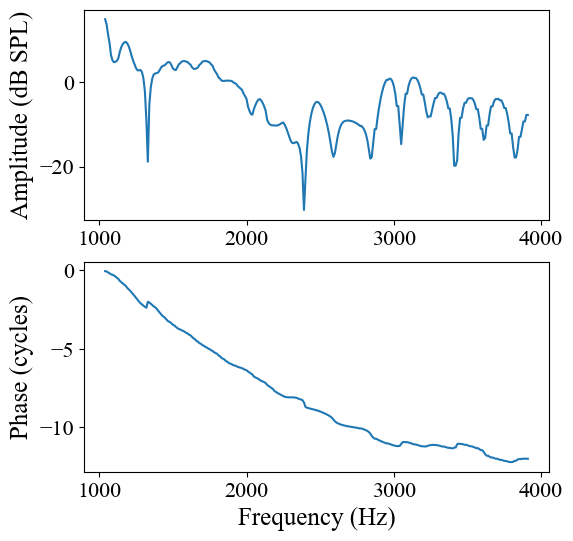

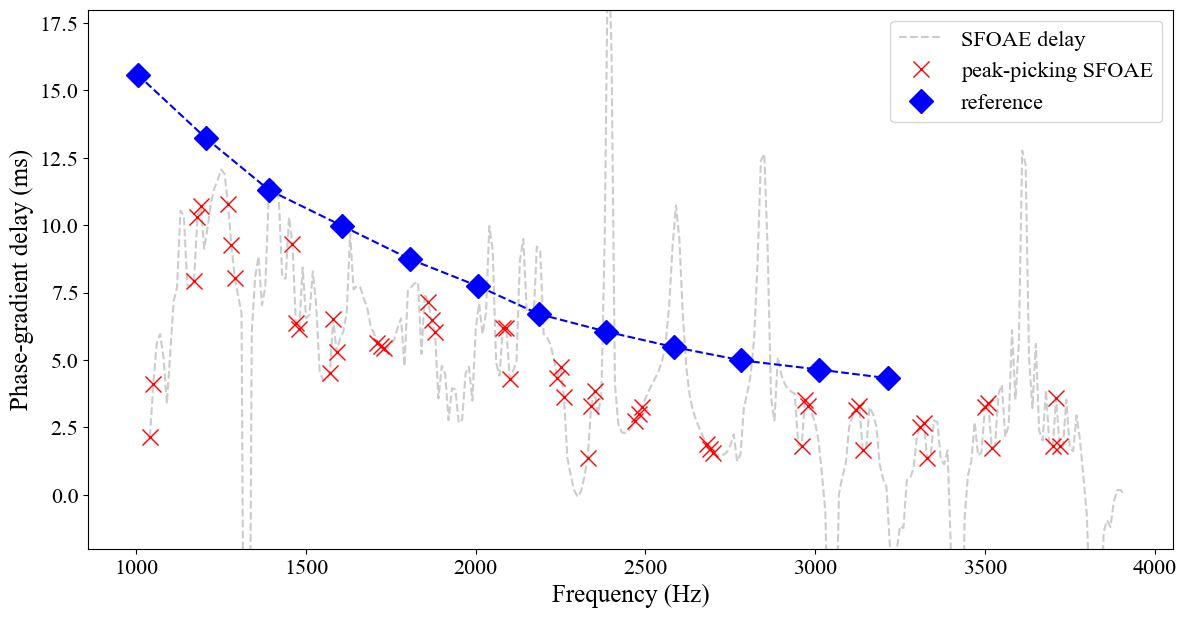

In [6]:
plt.rcParams['font.family'] = 'Times New Roman'

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 6))
plt.subplots_adjust(wspace=0.3)
ax1.plot(fx, SPL)
# ax1.set_xlabel("Frequency (Hz)", fontdict={"fontsize": 18})
ax1.set_ylabel("Amplitude (dB SPL)", fontdict={"fontsize": 18})
ax1.tick_params(axis='both', which='major', labelsize=16)

ax2.plot(fx, phase)
ax2.set_xlabel("Frequency (Hz)", fontdict={"fontsize": 18})
ax2.set_ylabel("Phase (cycles)", fontdict={"fontsize": 18})
ax2.tick_params(axis='both', which='major', labelsize=16)
# plt.savefig("exp1.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(fx, 1000*grad_delay, '0.8', linestyle='--', label='SFOAE delay')
ax.plot(fx[ext_maximas_SFOAE], 1000*grad_delay[ext_maximas_SFOAE],
        "rx", markersize=12, label='peak-picking SFOAE')

# reference values
for i, freq_ISOINT in enumerate(freq_ISOINT_list):
    max_idx = max_idx_ISOINT_list[i]
    grad_delay_ISOINT = GD_ISOINT_list[i]
    ax.plot(freq_ISOINT[max_idx], 1000*grad_delay_ISOINT[max_idx], "bD", markersize=12,
            label='reference' if i == 0 else None)
    if i > 0:  # connect points starting from the second point
        ax.plot([freq_ISOINT_list[i-1][max_idx_ISOINT_list[i-1]], freq_ISOINT[max_idx]],
                [1000*GD_ISOINT_list[i-1][max_idx_ISOINT_list[i-1]],
                    1000*grad_delay_ISOINT[max_idx]],
                "b--")
        
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Frequency (Hz)', fontdict={"fontsize": 18})
ax.set_ylabel('Phase-gradient delay (ms)', fontdict={"fontsize": 18})
ax.set_ylim(-2, 18)
ax.legend(fontsize=16)
# plt.savefig("exp1_peaks.png", dpi=300)
plt.show()
